# Math 725 Advanced Linear Algebra
## Polytopes


### Brent A. Thorne

brentathorne@gmail.com

##### Use homogenous transformations to generate polytopes.

In [1]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [2]:
def plain_plot(x,y):
    plt.clf()
    title='3D object projected into 2D'
    lim = 3
    plt.title(f"{title}"); 
    plt.xlabel("X axis"); 
    plt.ylabel("Y axis")
    plt.scatter(x,y, color ="red")
    plt.plot(x,y, color ="blue")
    plt.xlim(-lim,lim); plt.ylim(-lim,lim)
    plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')

In [3]:
def rot(thetaX,thetaY, thetaZ): 
    #rot X
    Tx = np.matrix([[1,0,0,0],\
            [0,np.cos(thetaX),-np.sin(thetaX),0],\
            [0,np.sin(thetaX),np.cos(thetaX),0],\
            [0,0,0,1]])
    #rot Y
    Ty = np.matrix([[np.cos(thetaY),0,np.sin(thetaY),0],\
            [0,1,0,0],\
            [-np.sin(thetaY),0,np.cos(thetaY),0],\
            [0,0,0,1]])

    #rot Z
    Tz = np.matrix([[np.cos(thetaZ),-np.sin(thetaZ),0,0],\
            [np.sin(thetaZ),np.cos(thetaZ),0,0],\
            [0,0,1,0],\
            [0,0,0,1]])
    return(Tz*Ty*Tx) # think about the order of operatons here, this seems natural

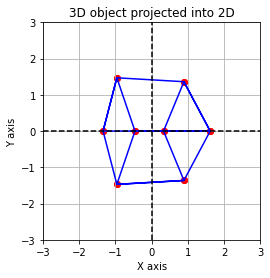

In [4]:
# Manually define a cube by the point on each face
D = np.matrix(([[1,-1,-1, 1,1,  1,-1,-1, 1,  1, 1,-1,-1, -1,-1, 1, 1],\
                [1, 1,-1,-1,1,  1, 1,-1,-1,  1, 1, 1, 1, -1,-1,-1,-1],\
                [1, 1, 1, 1,1, -1,-1,-1,-1, -1, 1, 1,-1, -1, 1, 1,-1],\
                [1, 1, 1, 1,1,  1, 1, 1, 1,  1, 1, 1, 1,  1, 1, 1, 1]]))

# Let's do a projection for the sake of visualization.
# Look Ma, I do Maths!
d = 10 # distance of projection
P = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,-1/d,1]])

# do a rotatation and projection
phi = 2*np.pi/8
T = rot(phi,phi/2,0)
M = P*(T*D)
H = M[3]
N = np.divide(M,H)[0:2] # normalize

# Display Object
x,=N[0].tolist()
y,=N[1].tolist()
plain_plot(x,y)

### Define object as a point harmonically rotated in $S^2$.

This fun! ...thinking about the lenght of a line thru our points on the surface $S^2$

This is almost right!  We'll return to this later.

Ask Arek about a way to approach this analyically.

We know $S^2$ isn't a valid vector space however below we demonstrate that this harmonic approach is possible.

It's just a bit egged shaped...

(4, 9)

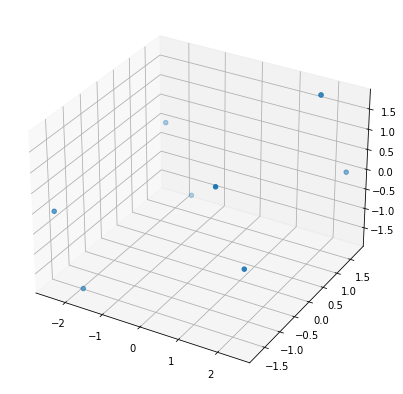

In [5]:
# Now let's define our object as a point harmonically rotated
D = np.sqrt(3)*np.matrix([1,1,1,1]).T
P = np.eye(4) # use Indentity Projection

#generate our object harmonically
n=8; 
phi_s = 4*np.pi/n;
rho_s = phi_s/2 #phi and rho step 
M = D # define our initial point
for i in range(n): 
    phi = i*phi_s
    rho = i*rho_s
    T = rot(phi,rho,0) 
    M = np.append(M, P*(T*D), axis=1)
display(np.shape(M))
# normalize    
H = M[3]; N = np.divide(M,H)[0:2]; 

x,=M[0].tolist(); y,=M[1].tolist(); z,=M[2].tolist();
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z);

### Let's go off the map a bit...
Consider sets for which no useful notion of addition exist, because that's where we are...

$S^2=\{(x,y,x)\in \Bbb{R}^3| x^2+y^2+z^2=1\}$

This is the 2D surface of a sphere. Clearly, no way to add North, $N=(0,0,1)$ to South, $S=(0,0,-1)$.  Also note that origin $(0,0,0)$ is not in $S^2$.

### Let's define our object as rotation around an axis instead.

We'll try to figure out a more general way to do this later...  Baby steps.

matrix([[ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.],
        [ 1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.],
        [ 1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

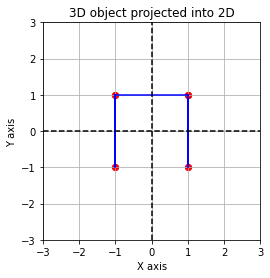

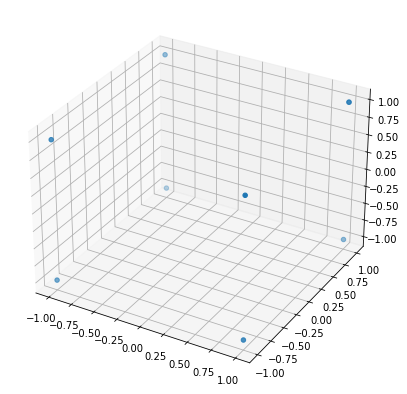

In [6]:
# Now let's define our object as a point cyclicly rotated
D = np.matrix([1,1,1,1]).T
P = np.eye(4) # use Indentity Projection

n=8
M=D # our object
for i in range(n//2): 
    phi = i* 2*np.pi/(n//2)
    T = rot(phi,0,0)   
    M = np.append(M, P*(T*D), axis=1)
    H = M[3]
    N = np.divide(M,H)[0:2] # normalize

for i in range(n//2): 
    phi = i* 2*np.pi/(n//2)
    T = rot(0,np.pi,0)* rot(phi,0,0)   
    M = np.append(M, P*(T*D), axis=1)
    H = M[3]
    N = np.divide(M,H)[0:2] # normalize

x,=N[0].tolist(); y,=N[1].tolist();
plain_plot(x,y)

#display(np.shape(M))
display(M)
x,=M[0].tolist(); y,=M[1].tolist(); z,=M[2].tolist();
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z);

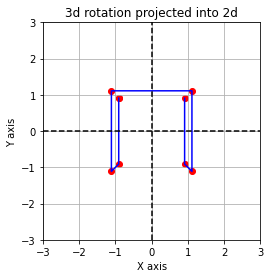

In [7]:
import matplotlib.animation as manimation

metadata = dict(title='Harmonic Shapes',
                artist='Brent A. Thorne',
                comment='Be excellent to each other!!')

FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()

# we're being a bit sloppy with our scope, but not I'm getting paid to do this
def frame_plot(x,y): 
    plt.clf()
    title='3d rotation projected into 2d'
    lim = 3
    plt.title(f"{title}"); 
    plt.xlabel("X axis"); 
    plt.ylabel("Y axis")
    plt.scatter(x,y, color ="red")
    plt.plot(x,y, color ="blue")
    plt.xlim(-lim,lim); plt.ylim(-lim,lim)
    plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')
    writer.grab_frame();

D=M #use our work from above
d = 10 # distance of projection
P = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,-1/d,1]])
      
n = 1000; theta = np.linspace(0, 6*np.pi, n) 
#n = 10; theta = np.linspace(0, np.pi/4, n);

# Update the frames for the movie
with writer.saving(fig, "Data/harmonica.mp4", 100):
    for i in theta:
        T = rot(i,i/2,0)
        M = P*(T*D)
        H = M[3]
        N = np.divide(M,H)[0:2]
        
        x,=N[0].tolist()
        y,=N[1].tolist()
        frame_plot(x,y);

### Check youself
See file: Data/harmonica.mp4

Note: Jupyter notebook will only checkpoint an embedded video the first time this markdown is generated.  

<video src="Data/harmonica.mp4"></video>

In [9]:
#...so it's better to display the video in HTML

from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="Data/harmonica.mp4" type="video/mp4">
</video></div>""")